*This script generates all graphs for replication results, main results on SD, and exploratory results on lesions*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats

# 0. Data preparation

## loading data from CA files

In [2]:
indexes = ['ca1', 'ca2', 'ca3', 'ca4', 'ca5', 'ca6', 'ca7', 'ca8', 'ca9', 'ca10', 'ca11', 'ca12']
indexes_object = ['ca1', 'ca2', 'ca3', 'ca4', 'ca5', 'ca6']
indexes_action = ['ca7', 'ca8', 'ca9', 'ca10', 'ca11', 'ca12']
columns = ['V1', 'TO', 'AT', 'PF-L', 'PM-L', 'M1-L','A1', 'AB', 'PB', 'PF-i', 'PM-i', 'M1-i']
columns_extrasylvian = ['V1', 'TO', 'AT', 'PF-L', 'PM-L', 'M1-L']
columns_perisylvian = ['A1', 'AB', 'PB', 'PF-i', 'PM-i', 'M1-i']



nets_num = 13
nets_num_lesion = 4

In [3]:
#load ca-structure no SD
lines = []
for machine_num in range(nets_num):
    f = open("CA-structure_u"+ str(machine_num) + '_adj'+ ".txt", "r")
    f.readline()
    for line_num in range(12):
        line = [int(cell_num) for cell_num in f.readline().split()[2:]]
        lines.append(line)
    
data_ca = pd.DataFrame(lines, index = indexes*nets_num, columns = columns)

In [4]:
#load recognition no SD
lines = []
for machine_num in range(nets_num):
    f = open("CA-structure_u"+ str(machine_num) + '_adj_re'+ ".txt", "r")
    f.readline()
    for line_num in range(12):
        line = [int(cell_num) for cell_num in f.readline().split()[2:]]
        lines.append(line)
    
data_re = pd.DataFrame(lines, index = indexes*nets_num, columns = columns)

In [5]:
#load recognition for SD GM30
lines = []
for machine_num in range(nets_num):
    f = open("CA-structure_u"+ str(machine_num) +"_gm30_re"+".txt", "r")
    f.readline()
    for line_num in range(12):
        line = [int(cell_num) for cell_num in f.readline().split()[2:]]
        lines.append(line)
    
data_gm30_re = pd.DataFrame(lines, index = indexes*nets_num, columns = columns)

In [6]:
#load recognition for SD GM60
lines = []
for machine_num in range(nets_num):
    f = open("CA-structure_u"+ str(machine_num) +"_gm60_re"+".txt", "r")
    f.readline()
    for line_num in range(12):
        line = [int(cell_num) for cell_num in f.readline().split()[2:]]
        lines.append(line)
    
data_gm60_re = pd.DataFrame(lines, index = indexes*nets_num, columns = columns)

In [7]:
#load recognition for SD GM90
lines = []
for machine_num in range(nets_num):
    f = open("CA-structure_u"+ str(machine_num) +"_gm90_re"+".txt", "r")
    f.readline()
    for line_num in range(12):
        line = [int(cell_num) for cell_num in f.readline().split()[2:]]
        lines.append(line)
    
data_gm90_re = pd.DataFrame(lines, index = indexes*nets_num, columns = columns)

In [8]:
#load recognition for SD WM30
lines = []
for machine_num in range(nets_num):
    f = open("CA-structure_u"+ str(machine_num) +"_wm30_re"+".txt", "r")
    f.readline()
    for line_num in range(12):
        line = [int(cell_num) for cell_num in f.readline().split()[2:]]
        lines.append(line)
    
data_wm30_re = pd.DataFrame(lines, index = indexes*nets_num, columns = columns)

In [9]:
#load recognition for SD WM60
lines = []
for machine_num in range(nets_num):
    f = open("CA-structure_u"+ str(machine_num) +"_wm60_re"+".txt", "r")
    f.readline()
    for line_num in range(12):
        line = [int(cell_num) for cell_num in f.readline().split()[2:]]
        lines.append(line)
    
data_wm60_re = pd.DataFrame(lines, index = indexes*nets_num, columns = columns)

In [10]:
#load recognition for SD WM90
lines = []
for machine_num in range(nets_num):
    f = open("CA-structure_u"+ str(machine_num) +"_wm90_re"+".txt", "r")
    f.readline()
    for line_num in range(12):
        line = [int(cell_num) for cell_num in f.readline().split()[2:]]
        lines.append(line)
    
data_wm90_re = pd.DataFrame(lines, index = indexes*nets_num, columns = columns)

In [11]:
#load CA without lesions
lines = []
for machine_num in range(nets_num_lesion):
    f = open("CA-structure_u"+ str(machine_num) + '_adj_lesion.txt', "r")
    f.readline()
    for line_num in range(12):
        line = [int(cell_num) for cell_num in f.readline().split()[2:]]
        lines.append(line)
    
data_no_lesion = pd.DataFrame(lines, index = indexes*nets_num_lesion, columns = columns)

In [12]:
#load CA with V1 lesions
lines = []
for machine_num in range(nets_num_lesion):
    f = open("CA-structure_u"+ str(machine_num) + '_lV1'+ ".txt", "r")
    f.readline()
    for line_num in range(12):
        line = [int(cell_num) for cell_num in f.readline().split()[2:]]
        lines.append(line)
    
data_V1_lesion = pd.DataFrame(lines, index = indexes*nets_num_lesion, columns = columns)

In [13]:
#load CA with M1 lesions
lines = []
for machine_num in range(nets_num_lesion):
    f = open("CA-structure_u"+ str(machine_num) + '_lM1'+ ".txt", "r")
    f.readline()
    for line_num in range(12):
        line = [int(cell_num) for cell_num in f.readline().split()[2:]]
        lines.append(line)
    
data_M1_lesion = pd.DataFrame(lines, index = indexes*nets_num_lesion, columns = columns)

### Calculating mean activations (averaging object CAs within each net and action CAs within each net)

In [14]:
# means for ca-structure no SD

obj_lines = []
for i in range(13):
    line = list(data_ca[12*i:12*i+6].mean())
    obj_lines.append(line)
    
obj_mean_cells_no_ca = pd.DataFrame(obj_lines, columns = columns)

act_lines = []
for i in range(13):
    line = list(data_ca[12*i+6:12*i+12].mean())
    act_lines.append(line)
    
act_mean_cells_no_ca = pd.DataFrame(act_lines, columns = columns)


In [15]:
# means for recognition no SD

obj_lines = []
for i in range(13):
    line = list(data_re[12*i:12*i+6].mean())
    obj_lines.append(line)
    
obj_mean_cells_no = pd.DataFrame(obj_lines, columns = columns)

act_lines = []
for i in range(13):
    line = list(data_re[12*i+6:12*i+12].mean())
    act_lines.append(line)
    
act_mean_cells_no = pd.DataFrame(act_lines, columns = columns)


In [16]:
# means for recognition GM SD 30%

obj_lines = []
for i in range(13):
    line = list(data_gm30_re[12*i:12*i+6].mean())
    obj_lines.append(line)
    
obj_mean_cells_gm30 = pd.DataFrame(obj_lines, columns = columns)


act_lines = []
for i in range(13):
    line = list(data_gm30_re[12*i+6:12*i+12].mean())
    act_lines.append(line)
    
act_mean_cells_gm30 = pd.DataFrame(act_lines, columns = columns)


In [17]:
# means for recognition GM SD 60%

obj_lines = []
for i in range(13):
    line = list(data_gm60_re[12*i:12*i+6].mean())
    obj_lines.append(line)
    
obj_mean_cells_gm60 = pd.DataFrame(obj_lines, columns = columns)


act_lines = []
for i in range(13):
    line = list(data_gm60_re[12*i+6:12*i+12].mean())
    act_lines.append(line)
    
act_mean_cells_gm60 = pd.DataFrame(act_lines, columns = columns)


In [18]:
# means for recognition GM SD 90%

obj_lines = []
for i in range(13):
    line = list(data_gm90_re[12*i:12*i+6].mean())
    obj_lines.append(line)
    
obj_mean_cells_gm90 = pd.DataFrame(obj_lines, columns = columns)


act_lines = []
for i in range(13):
    line = list(data_gm90_re[12*i+6:12*i+12].mean())
    act_lines.append(line)
    
act_mean_cells_gm90 = pd.DataFrame(act_lines, columns = columns)


In [19]:
# means for recognition WM SD 30%

obj_lines = []
for i in range(13):
    line = list(data_wm30_re[12*i:12*i+6].mean())
    obj_lines.append(line)
    
obj_mean_cells_wm30 = pd.DataFrame(obj_lines, columns = columns)


act_lines = []
for i in range(13):
    line = list(data_wm30_re[12*i+6:12*i+12].mean())
    act_lines.append(line)
    
act_mean_cells_wm30 = pd.DataFrame(act_lines, columns = columns)


In [20]:
# means for recognition WM SD 60%

obj_lines = []
for i in range(13):
    line = list(data_wm60_re[12*i:12*i+6].mean())
    obj_lines.append(line)
    
obj_mean_cells_wm60 = pd.DataFrame(obj_lines, columns = columns)


act_lines = []
for i in range(13):
    line = list(data_wm60_re[12*i+6:12*i+12].mean())
    act_lines.append(line)
    
act_mean_cells_wm60 = pd.DataFrame(act_lines, columns = columns)


In [21]:
# means for recognition WM SD 90%

obj_lines = []
for i in range(13):
    line = list(data_wm90_re[12*i:12*i+6].mean())
    obj_lines.append(line)
    
obj_mean_cells_wm90 = pd.DataFrame(obj_lines, columns = columns)


act_lines = []
for i in range(13):
    line = list(data_wm90_re[12*i+6:12*i+12].mean())
    act_lines.append(line)
    
act_mean_cells_wm90 = pd.DataFrame(act_lines, columns = columns)


In [22]:
# means for no lesion

obj_lines = []
for i in range(nets_num_lesion): 
    line = list(data_no_lesion[12*i:12*i+6].mean())
    obj_lines.append(line)
    
obj_mean_cells_no_lesion = pd.DataFrame(obj_lines, columns = columns)

act_lines = []
for i in range(nets_num_lesion):
    line = list(data_no_lesion[12*i+6:12*i+12].mean())
    act_lines.append(line)
    
act_mean_cells_no_lesion = pd.DataFrame(act_lines, columns = columns)

In [23]:
# means for lesion in V1

obj_lines = []
for i in range(nets_num_lesion): 
    line = list(data_V1_lesion[12*i:12*i+6].mean())
    obj_lines.append(line)
    
obj_mean_cells_V1_lesion = pd.DataFrame(obj_lines, columns = columns)

act_lines = []
for i in range(nets_num_lesion):
    line = list(data_V1_lesion[12*i+6:12*i+12].mean())
    act_lines.append(line)
    
act_mean_cells_V1_lesion = pd.DataFrame(act_lines, columns = columns)

In [24]:
# means for lesion in M1

obj_lines = []
for i in range(nets_num_lesion): 
    line = list(data_M1_lesion[12*i:12*i+6].mean())
    obj_lines.append(line)
    
obj_mean_cells_M1_lesion = pd.DataFrame(obj_lines, columns = columns)

act_lines = []
for i in range(nets_num_lesion):
    line = list(data_M1_lesion[12*i+6:12*i+12].mean())
    act_lines.append(line)
    
act_mean_cells_M1_lesion = pd.DataFrame(act_lines, columns = columns)

# 1. Graphs for G&P 2016 replication 

## Fig9

In [25]:
# calculate means and sems for graphs

# separate extra and peri areas
ca_extra_obj_ca = obj_mean_cells_no_ca[columns_extrasylvian]
ca_peri_obj_ca = obj_mean_cells_no_ca[columns_perisylvian]
ca_extra_act_ca = act_mean_cells_no_ca[columns_extrasylvian]
ca_peri_act_ca = act_mean_cells_no_ca[columns_perisylvian]

#calculate mean activations between nets per each area
mean_extra_obj_ca = np.mean(ca_extra_obj_ca)
mean_peri_obj_ca = np.mean(ca_peri_obj_ca)
mean_extra_act_ca = np.mean(ca_extra_act_ca)
mean_peri_act_ca = np.mean(ca_peri_act_ca)

#calculate sem (for mean activations between nets) per each area
sem_extra_obj_ca = scipy.stats.sem(ca_extra_obj_ca, axis = 0)
sem_peri_obj_ca = scipy.stats.sem(ca_peri_obj_ca, axis = 0)
sem_extra_act_ca = scipy.stats.sem(ca_extra_act_ca, axis = 0)
sem_peri_act_ca = scipy.stats.sem(ca_peri_act_ca, axis = 0)


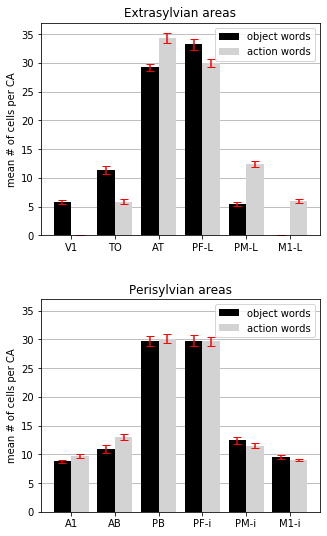

In [26]:
x = [i for i in range(1,7)]
x_obj = [i - 0.2 for i in range(1,7)]
x_act = [i + 0.2 for i in range(1,7)]

fig, axes = plt.subplots(2, 1, figsize=(5,9))

plt.subplots_adjust(hspace = 0.3)



# graph for extra areas
ax = axes[0]

ax.yaxis.grid()  
ax.set_axisbelow(True)

ax.bar(x_obj, mean_extra_obj_ca, color = 'black', width=0.4, label='object words')
ax.bar(x_act, mean_extra_act_ca, color = 'lightgrey', width=0.4, label='action words')

ax.errorbar(x_obj, mean_extra_obj_ca, yerr = sem_extra_obj_ca, fmt='none', color = 'red', capsize=4)
ax.errorbar(x_act, mean_extra_act_ca, yerr = sem_extra_act_ca, fmt='none', color = 'red', capsize=4)

ax.set_xticks(x) 
ax.set_xticklabels(columns_extrasylvian)
ax.set_ylim([0, 37])  

ax.set_ylabel('mean # of cells per CA')
ax.set_title('Extrasylvian areas')
ax.legend()



# graph for peri areas
ax = axes[1]

ax.yaxis.grid()  
ax.set_axisbelow(True)

ax.bar(x_obj, mean_peri_obj_ca, color = 'black', width=0.4, label='object words')
ax.bar(x_act, mean_peri_act_ca, color = 'lightgrey', width=0.4, label='action words')

ax.errorbar(x_obj, mean_peri_obj_ca, yerr = sem_peri_obj_ca, fmt='none', color = 'red', capsize=4)
ax.errorbar(x_act, mean_peri_act_ca, yerr = sem_peri_act_ca, fmt='none', color = 'red', capsize=4)

ax.set_xticks(x) 
ax.set_xticklabels(columns_perisylvian)
ax.set_ylim([0, 37])

ax.set_ylabel('mean # of cells per CA')
ax.set_title('Perisylvian areas')
ax.legend()


# 2. Graphs for current experiment (main part)

## Fig10

In [27]:
#plot1 extra, obj, GM

# data
ca_extra_obj_re = obj_mean_cells_no[columns_extrasylvian]
ca_extra_obj_gm30 = obj_mean_cells_gm30[columns_extrasylvian]
ca_extra_obj_gm60 = obj_mean_cells_gm60[columns_extrasylvian]
ca_extra_obj_gm90 = obj_mean_cells_gm90[columns_extrasylvian]

# calculate mean activations between nets per each area
mean_extra_obj_re = np.mean(ca_extra_obj_re)
mean_extra_obj_gm30 = np.mean(ca_extra_obj_gm30)
mean_extra_obj_gm60 = np.mean(ca_extra_obj_gm60)
mean_extra_obj_gm90 = np.mean(ca_extra_obj_gm90)

# calculate sem (for mean activations between nets) per each area
sem_extra_obj_re = scipy.stats.sem(ca_extra_obj_re)
sem_extra_obj_gm30 = scipy.stats.sem(ca_extra_obj_gm30)
sem_extra_obj_gm60 = scipy.stats.sem(ca_extra_obj_gm60)
sem_extra_obj_gm90 = scipy.stats.sem(ca_extra_obj_gm90)


In [28]:
#plot2 extra, obj, WM

# data
ca_extra_obj_re = obj_mean_cells_no[columns_extrasylvian]
ca_extra_obj_wm30 = obj_mean_cells_wm30[columns_extrasylvian]
ca_extra_obj_wm60 = obj_mean_cells_wm60[columns_extrasylvian]
ca_extra_obj_wm90 = obj_mean_cells_wm90[columns_extrasylvian]

# means
mean_extra_obj_re = np.mean(ca_extra_obj_re)
mean_extra_obj_wm30 = np.mean(ca_extra_obj_wm30)
mean_extra_obj_wm60 = np.mean(ca_extra_obj_wm60)
mean_extra_obj_wm90 = np.mean(ca_extra_obj_wm90)

# sems
sem_extra_obj_re = scipy.stats.sem(ca_extra_obj_re)
sem_extra_obj_wm30 = scipy.stats.sem(ca_extra_obj_wm30)
sem_extra_obj_wm60 = scipy.stats.sem(ca_extra_obj_wm60)
sem_extra_obj_wm90 = scipy.stats.sem(ca_extra_obj_wm90)


In [29]:
#plot3 extra, act, GM

# data
ca_extra_act_re = act_mean_cells_no[columns_extrasylvian]
ca_extra_act_gm30 = act_mean_cells_gm30[columns_extrasylvian]
ca_extra_act_gm60 = act_mean_cells_gm60[columns_extrasylvian]
ca_extra_act_gm90 = act_mean_cells_gm90[columns_extrasylvian]

# means
mean_extra_act_re = np.mean(ca_extra_act_re)
mean_extra_act_gm30 = np.mean(ca_extra_act_gm30)
mean_extra_act_gm60 = np.mean(ca_extra_act_gm60)
mean_extra_act_gm90 = np.mean(ca_extra_act_gm90)

# sems
sem_extra_act_re = scipy.stats.sem(ca_extra_act_re)
sem_extra_act_gm30 = scipy.stats.sem(ca_extra_act_gm30)
sem_extra_act_gm60 = scipy.stats.sem(ca_extra_act_gm60)
sem_extra_act_gm90 = scipy.stats.sem(ca_extra_act_gm90)

In [30]:
#plot4 extra, act, WM

#data
ca_extra_act_re = act_mean_cells_no[columns_extrasylvian]
ca_extra_act_wm30 = act_mean_cells_wm30[columns_extrasylvian]
ca_extra_act_wm60 = act_mean_cells_wm60[columns_extrasylvian]
ca_extra_act_wm90 = act_mean_cells_wm90[columns_extrasylvian]

# means
mean_extra_act_re = np.mean(ca_extra_act_re)
mean_extra_act_wm30 = np.mean(ca_extra_act_wm30)
mean_extra_act_wm60 = np.mean(ca_extra_act_wm60)
mean_extra_act_wm90 = np.mean(ca_extra_act_wm90)

# sems
sem_extra_act_re = scipy.stats.sem(ca_extra_act_re)
sem_extra_act_wm30 = scipy.stats.sem(ca_extra_act_wm30)
sem_extra_act_wm60 = scipy.stats.sem(ca_extra_act_wm60)
sem_extra_act_wm90 = scipy.stats.sem(ca_extra_act_wm90)

In [31]:
#plot5 peri, obj, GM

# data
ca_peri_obj_re = obj_mean_cells_no[columns_perisylvian]
ca_peri_obj_gm30 = obj_mean_cells_gm30[columns_perisylvian]
ca_peri_obj_gm60 = obj_mean_cells_gm60[columns_perisylvian]
ca_peri_obj_gm90 = obj_mean_cells_gm90[columns_perisylvian]

# means
mean_peri_obj_re = np.mean(ca_peri_obj_re)
mean_peri_obj_gm30 = np.mean(ca_peri_obj_gm30)
mean_peri_obj_gm60 = np.mean(ca_peri_obj_gm60)
mean_peri_obj_gm90 = np.mean(ca_peri_obj_gm90)

# sems
sem_peri_obj_re = scipy.stats.sem(ca_peri_obj_re)
sem_peri_obj_gm30 = scipy.stats.sem(ca_peri_obj_gm30)
sem_peri_obj_gm60 = scipy.stats.sem(ca_peri_obj_gm60)
sem_peri_obj_gm90 = scipy.stats.sem(ca_peri_obj_gm90)

In [32]:
#plot6 peri, obj, WM

# data
ca_peri_obj_re = obj_mean_cells_no[columns_perisylvian]
ca_peri_obj_wm30 = obj_mean_cells_wm30[columns_perisylvian]
ca_peri_obj_wm60 = obj_mean_cells_wm60[columns_perisylvian]
ca_peri_obj_wm90 = obj_mean_cells_wm90[columns_perisylvian]

# means
mean_peri_obj_re = np.mean(ca_peri_obj_re)
mean_peri_obj_wm30 = np.mean(ca_peri_obj_wm30)
mean_peri_obj_wm60 = np.mean(ca_peri_obj_wm60)
mean_peri_obj_wm90 = np.mean(ca_peri_obj_wm90)

# sems
sem_peri_obj_re = scipy.stats.sem(ca_peri_obj_re)
sem_peri_obj_wm30 = scipy.stats.sem(ca_peri_obj_wm30)
sem_peri_obj_wm60 = scipy.stats.sem(ca_peri_obj_wm60)
sem_peri_obj_wm90 = scipy.stats.sem(ca_peri_obj_wm90)


In [33]:
#plot7 peri, act, GM

# data
ca_peri_act_re = act_mean_cells_no[columns_perisylvian]
ca_peri_act_gm30 = act_mean_cells_gm30[columns_perisylvian]
ca_peri_act_gm60 = act_mean_cells_gm60[columns_perisylvian]
ca_peri_act_gm90 = act_mean_cells_gm90[columns_perisylvian]

# means
mean_peri_act_re = np.mean(ca_peri_act_re)
mean_peri_act_gm30 = np.mean(ca_peri_act_gm30)
mean_peri_act_gm60 = np.mean(ca_peri_act_gm60)
mean_peri_act_gm90 = np.mean(ca_peri_act_gm90)

# sems
sem_peri_act_re = scipy.stats.sem(ca_peri_act_re)
sem_peri_act_gm30 = scipy.stats.sem(ca_peri_act_gm30)
sem_peri_act_gm60 = scipy.stats.sem(ca_peri_act_gm60)
sem_peri_act_gm90 = scipy.stats.sem(ca_peri_act_gm90)


In [34]:
#plot8 peri, act, WM

# data
ca_peri_act_re = act_mean_cells_no[columns_perisylvian]
ca_peri_act_wm30 = act_mean_cells_wm30[columns_perisylvian]
ca_peri_act_wm60 = act_mean_cells_wm60[columns_perisylvian]
ca_peri_act_wm90 = act_mean_cells_wm90[columns_perisylvian]

# means
mean_peri_act_re = np.mean(ca_peri_act_re)
mean_peri_act_wm30 = np.mean(ca_peri_act_wm30)
mean_peri_act_wm60 = np.mean(ca_peri_act_wm60)
mean_peri_act_wm90 = np.mean(ca_peri_act_wm90)

# sems
sem_peri_act_re = scipy.stats.sem(ca_peri_act_re)
sem_peri_act_wm30 = scipy.stats.sem(ca_peri_act_wm30)
sem_peri_act_wm60 = scipy.stats.sem(ca_peri_act_wm60)
sem_peri_act_wm90 = scipy.stats.sem(ca_peri_act_wm90)

**obj & GM**

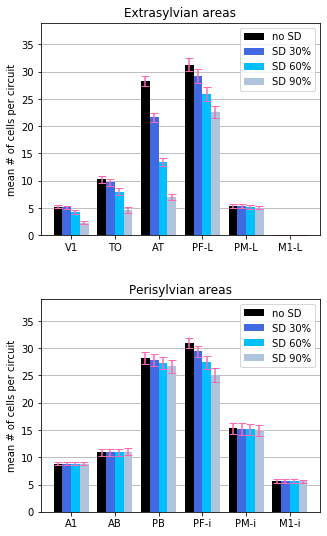

In [35]:
x = [i*2 for i in range(1,7)]
x_wo = [i*2 - 0.6 for i in range(1,7)]
x_30 = [i*2 - 0.2 for i in range(1,7)]
x_60 = [i*2 + 0.2 for i in range(1,7)]
x_90 = [i*2 + 0.6 for i in range(1,7)]

fig, axes = plt.subplots(2, 1, figsize=(5,9))

# fig.suptitle("Extrasylvian areas",y = 0.93, fontsize=20)
plt.subplots_adjust(hspace = 0.3)



# plot 1 -- extra, obj, GM
ax = axes[0]

ax.yaxis.grid()  
ax.set_axisbelow(True)

ax.bar(x_wo, mean_extra_obj_re, width=0.4,  color = 'black', label='no SD')
ax.bar(x_30, mean_extra_obj_gm30, width=0.4,  color = 'royalblue', label='SD 30%')
ax.bar(x_60, mean_extra_obj_gm60, width=0.4,  color = 'deepskyblue', label='SD 60%')
ax.bar(x_90, mean_extra_obj_gm90, width=0.4,  color = 'lightsteelblue', label='SD 90%')

ax.errorbar(x_wo, mean_extra_obj_re, yerr = sem_extra_obj_re, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_30, mean_extra_obj_gm30, yerr = sem_extra_obj_gm30, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_60, mean_extra_obj_gm60, yerr = sem_extra_obj_gm60, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_90, mean_extra_obj_gm90, yerr = sem_extra_obj_gm90, fmt='none', color = 'hotpink', capsize=4)

ax.set_xticks(x) 
ax.set_xticklabels(columns_extrasylvian)
ax.set_ylim([0, 39])                   

ax.set_ylabel('mean # of cells per circuit')
ax.set_title('Extrasylvian areas')
ax.legend()



# plot 2 -- peri, obj, GM
ax = axes[1]

ax.yaxis.grid()  
ax.set_axisbelow(True)

ax.bar(x_wo, mean_peri_obj_re, width=0.4,  color = 'black', label='no SD')
ax.bar(x_30, mean_peri_obj_gm30, width=0.4,  color = 'royalblue', label='SD 30%')
ax.bar(x_60, mean_peri_obj_gm60, width=0.4,  color = 'deepskyblue', label='SD 60%')
ax.bar(x_90, mean_peri_obj_gm90, width=0.4,  color = 'lightsteelblue', label='SD 90%')

ax.errorbar(x_wo, mean_peri_obj_re, yerr = sem_peri_obj_re, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_30, mean_peri_obj_gm30, yerr = sem_peri_obj_gm30, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_60, mean_peri_obj_gm60, yerr = sem_peri_obj_gm60, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_90, mean_peri_obj_gm90, yerr = sem_peri_obj_gm90, fmt='none', color = 'hotpink', capsize=4)

ax.set_xticks(x) 
ax.set_xticklabels(columns_perisylvian)
ax.set_ylim([0, 39])                   

ax.set_ylabel('mean # of cells per circuit')
ax.set_title('Perisylvian areas')
ax.legend()

**obj & WM**

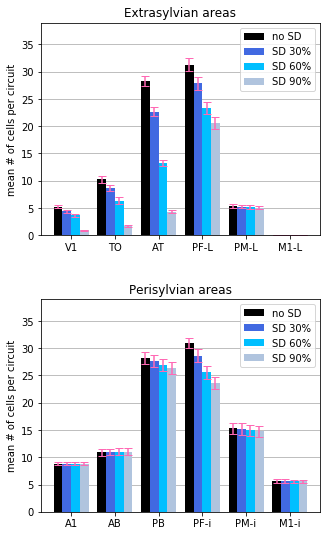

In [36]:
x = [i*2 for i in range(1,7)]
x_wo = [i*2 - 0.6 for i in range(1,7)]
x_30 = [i*2 - 0.2 for i in range(1,7)]
x_60 = [i*2 + 0.2 for i in range(1,7)]
x_90 = [i*2 + 0.6 for i in range(1,7)]

fig, axes = plt.subplots(2, 1, figsize=(5,9))

# fig.suptitle("Extrasylvian areas",y = 0.93, fontsize=20)
plt.subplots_adjust( hspace = 0.3)





# plot 1 -- extra, obj, WM
ax = axes[0]

ax.yaxis.grid()  
ax.set_axisbelow(True)

ax.bar(x_wo, mean_extra_obj_re, width=0.4,  color = 'black', label='no SD')
ax.bar(x_30, mean_extra_obj_wm30, width=0.4,  color = 'royalblue', label='SD 30%')
ax.bar(x_60, mean_extra_obj_wm60, width=0.4,  color = 'deepskyblue', label='SD 60%')
ax.bar(x_90, mean_extra_obj_wm90, width=0.4,  color = 'lightsteelblue', label='SD 90%')

ax.errorbar(x_wo, mean_extra_obj_re, yerr = sem_extra_obj_re, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_30, mean_extra_obj_wm30, yerr = sem_extra_obj_wm30, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_60, mean_extra_obj_wm60, yerr = sem_extra_obj_wm60, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_90, mean_extra_obj_wm90, yerr = sem_extra_obj_wm90, fmt='none', color = 'hotpink', capsize=4)

ax.set_xticks(x) 
ax.set_xticklabels(columns_extrasylvian)
ax.set_ylim([0, 39])                   

ax.set_ylabel('mean # of cells per circuit')
ax.set_title('Extrasylvian areas')
ax.legend()



# plot 2 -- peri, obj, WM
ax = axes[1]

ax.yaxis.grid()  
ax.set_axisbelow(True)

ax.bar(x_wo, mean_peri_obj_re, width=0.4,  color = 'black', label='no SD')
ax.bar(x_30, mean_peri_obj_wm30, width=0.4,  color = 'royalblue', label='SD 30%')
ax.bar(x_60, mean_peri_obj_wm60, width=0.4,  color = 'deepskyblue', label='SD 60%')
ax.bar(x_90, mean_peri_obj_wm90, width=0.4,  color = 'lightsteelblue', label='SD 90%')

ax.errorbar(x_wo, mean_peri_obj_re, yerr = sem_peri_obj_re, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_30, mean_peri_obj_wm30, yerr = sem_peri_obj_wm30, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_60, mean_peri_obj_wm60, yerr = sem_peri_obj_wm60, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_90, mean_peri_obj_wm90, yerr = sem_peri_obj_wm90, fmt='none', color = 'hotpink', capsize=4)

ax.set_xticks(x) 
ax.set_xticklabels(columns_perisylvian)
ax.set_ylim([0, 39])                   

ax.set_ylabel('mean # of cells per circuit')
ax.set_title('Perisylvian areas')
ax.legend()

**act & GM**

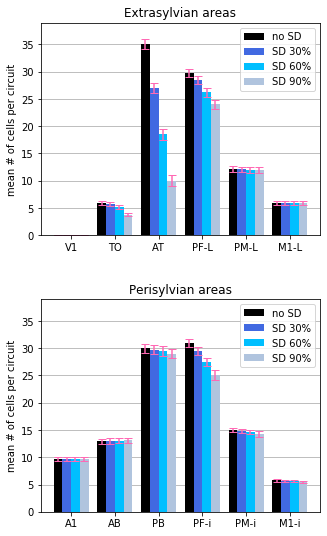

In [37]:
x = [i*2 for i in range(1,7)]
x_wo = [i*2 - 0.6 for i in range(1,7)]
x_30 = [i*2 - 0.2 for i in range(1,7)]
x_60 = [i*2 + 0.2 for i in range(1,7)]
x_90 = [i*2 + 0.6 for i in range(1,7)]

fig, axes = plt.subplots(2, 1, figsize=(5,9))

# fig.suptitle("Extrasylvian areas",y = 0.93, fontsize=20)
plt.subplots_adjust(hspace = 0.3)





# plot 1 -- extra, act, GM
ax = axes[0]

ax.yaxis.grid()  
ax.set_axisbelow(True)

ax.bar(x_wo, mean_extra_act_re, width=0.4,  color = 'black', label='no SD')
ax.bar(x_30, mean_extra_act_gm30, width=0.4,  color = 'royalblue', label='SD 30%')
ax.bar(x_60, mean_extra_act_gm60, width=0.4,  color = 'deepskyblue', label='SD 60%')
ax.bar(x_90, mean_extra_act_gm90, width=0.4,  color = 'lightsteelblue', label='SD 90%')

ax.errorbar(x_wo, mean_extra_act_re, yerr = sem_extra_act_re, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_30, mean_extra_act_gm30, yerr = sem_extra_act_gm30, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_60, mean_extra_act_gm60, yerr = sem_extra_act_gm60, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_90, mean_extra_act_gm90, yerr = sem_extra_act_gm90, fmt='none', color = 'hotpink', capsize=4)

ax.set_xticks(x) 
ax.set_xticklabels(columns_extrasylvian)
ax.set_ylim([0, 39])                   

ax.set_ylabel('mean # of cells per circuit')
ax.set_title('Extrasylvian areas')
ax.legend()



# plot 2 -- peri, act, GM
ax = axes[1]

ax.yaxis.grid()  
ax.set_axisbelow(True)

ax.bar(x_wo, mean_peri_act_re, width=0.4,  color = 'black', label='no SD')
ax.bar(x_30, mean_peri_act_gm30, width=0.4,  color = 'royalblue', label='SD 30%')
ax.bar(x_60, mean_peri_act_gm60, width=0.4,  color = 'deepskyblue', label='SD 60%')
ax.bar(x_90, mean_peri_act_gm90, width=0.4,  color = 'lightsteelblue', label='SD 90%')

ax.errorbar(x_wo, mean_peri_act_re, yerr = sem_peri_act_re, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_30, mean_peri_act_gm30, yerr = sem_peri_act_gm30, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_60, mean_peri_act_gm60, yerr = sem_peri_act_gm60, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_90, mean_peri_act_gm90, yerr = sem_peri_act_gm90, fmt='none', color = 'hotpink', capsize=4)

ax.set_xticks(x) 
ax.set_xticklabels(columns_perisylvian)
ax.set_ylim([0, 39])                   

ax.set_ylabel('mean # of cells per circuit')
ax.set_title('Perisylvian areas')
ax.legend()

**act & WM**

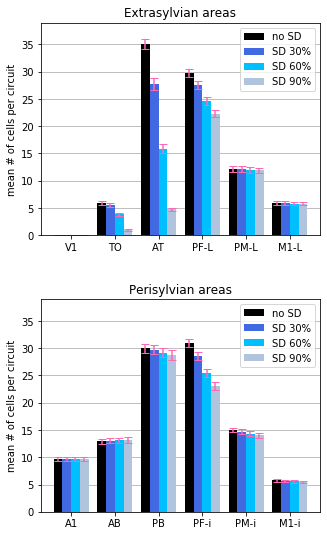

In [38]:
x = [i*2 for i in range(1,7)]
x_wo = [i*2 - 0.6 for i in range(1,7)]
x_30 = [i*2 - 0.2 for i in range(1,7)]
x_60 = [i*2 + 0.2 for i in range(1,7)]
x_90 = [i*2 + 0.6 for i in range(1,7)]

fig, axes = plt.subplots(2, 1, figsize=(5,9))

# fig.suptitle("Extrasylvian areas",y = 0.93, fontsize=20)
plt.subplots_adjust(hspace = 0.3)





# plot 1 -- extra, act, WM
ax = axes[0]

ax.yaxis.grid()  
ax.set_axisbelow(True)

ax.bar(x_wo, mean_extra_act_re, width=0.4,  color = 'black', label='no SD')
ax.bar(x_30, mean_extra_act_wm30, width=0.4,  color = 'royalblue', label='SD 30%')
ax.bar(x_60, mean_extra_act_wm60, width=0.4,  color = 'deepskyblue', label='SD 60%')
ax.bar(x_90, mean_extra_act_wm90, width=0.4,  color = 'lightsteelblue', label='SD 90%')

ax.errorbar(x_wo, mean_extra_act_re, yerr = sem_extra_act_re, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_30, mean_extra_act_wm30, yerr = sem_extra_act_wm30, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_60, mean_extra_act_wm60, yerr = sem_extra_act_wm60, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_90, mean_extra_act_wm90, yerr = sem_extra_act_wm90, fmt='none', color = 'hotpink', capsize=4)

ax.set_xticks(x) 
ax.set_xticklabels(columns_extrasylvian)
ax.set_ylim([0, 39])                   

ax.set_ylabel('mean # of cells per circuit')
ax.set_title('Extrasylvian areas')
ax.legend()



# plot 2 -- peri, act, GM
ax = axes[1]

ax.yaxis.grid()  
ax.set_axisbelow(True)

ax.bar(x_wo, mean_peri_act_re, width=0.4,  color = 'black', label='no SD')
ax.bar(x_30, mean_peri_act_wm30, width=0.4,  color = 'royalblue', label='SD 30%')
ax.bar(x_60, mean_peri_act_wm60, width=0.4,  color = 'deepskyblue', label='SD 60%')
ax.bar(x_90, mean_peri_act_wm90, width=0.4,  color = 'lightsteelblue', label='SD 90%')

ax.errorbar(x_wo, mean_peri_act_re, yerr = sem_peri_act_re, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_30, mean_peri_act_wm30, yerr = sem_peri_act_wm30, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_60, mean_peri_act_wm60, yerr = sem_peri_act_wm60, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_90, mean_peri_act_wm90, yerr = sem_peri_act_wm90, fmt='none', color = 'hotpink', capsize=4)

ax.set_xticks(x) 
ax.set_xticklabels(columns_perisylvian)
ax.set_ylim([0, 39])                   

ax.set_ylabel('mean # of cells per circuit')
ax.set_title('Perisylvian areas')
ax.legend()

## Fig11

In [39]:
# plot1

# summing up activations in 6 areas (either extra or peri) for obj, GM
ca_extra_obj_re_sum = list(ca_extra_obj_re.sum(axis = 1).values)
ca_extra_obj_gm30_sum = list(ca_extra_obj_gm30.sum(axis = 1).values)
ca_extra_obj_gm60_sum = list(ca_extra_obj_gm60.sum(axis = 1).values)
ca_extra_obj_gm90_sum = list(ca_extra_obj_gm90.sum(axis = 1).values)

ca_peri_obj_re_sum = list(ca_peri_obj_re.sum(axis = 1).values)
ca_peri_obj_gm30_sum = list(ca_peri_obj_gm30.sum(axis = 1).values)
ca_peri_obj_gm60_sum = list(ca_peri_obj_gm60.sum(axis = 1).values)
ca_peri_obj_gm90_sum = list(ca_peri_obj_gm90.sum(axis = 1).values)

# calculating rate = activation_with_SD/activation_wo_SD
ca_extra_obj_re_rate = [x/y for x, y in zip(ca_extra_obj_re_sum, ca_extra_obj_re_sum)] 
ca_extra_obj_gm30_rate = [x/y for x, y in zip(ca_extra_obj_gm30_sum, ca_extra_obj_re_sum)]
ca_extra_obj_gm60_rate = [x/y for x, y in zip(ca_extra_obj_gm60_sum, ca_extra_obj_re_sum)]
ca_extra_obj_gm90_rate = [x/y for x, y in zip(ca_extra_obj_gm90_sum, ca_extra_obj_re_sum)]

ca_peri_obj_re_rate = [x/y for x, y in zip(ca_peri_obj_re_sum, ca_peri_obj_re_sum)] 
ca_peri_obj_gm30_rate = [x/y for x, y in zip(ca_peri_obj_gm30_sum, ca_peri_obj_re_sum)] 
ca_peri_obj_gm60_rate = [x/y for x, y in zip(ca_peri_obj_gm60_sum, ca_peri_obj_re_sum)] 
ca_peri_obj_gm90_rate = [x/y for x, y in zip(ca_peri_obj_gm90_sum, ca_peri_obj_re_sum)] 


# means 
mean_extra_obj_gm_rate = [np.mean(ca_extra_obj_re_rate), np.mean(ca_extra_obj_gm30_rate), 
                         np.mean(ca_extra_obj_gm60_rate),np.mean(ca_extra_obj_gm90_rate)]
mean_peri_obj_gm_rate = [np.mean(ca_peri_obj_re_rate), np.mean(ca_peri_obj_gm30_rate), 
                         np.mean(ca_peri_obj_gm60_rate),np.mean(ca_peri_obj_gm90_rate)]
    
# sems
sem_extra_obj_gm_rate = [scipy.stats.sem(ca_extra_obj_gm30_rate), 
                         scipy.stats.sem(ca_extra_obj_gm60_rate),scipy.stats.sem(ca_extra_obj_gm90_rate)]
sem_peri_obj_gm_rate = [scipy.stats.sem(ca_peri_obj_gm30_rate), 
                         scipy.stats.sem(ca_peri_obj_gm60_rate),scipy.stats.sem(ca_peri_obj_gm90_rate)]



In [40]:
# plot2

# summing up activations in 6 areas (either extra or peri) for obj, WM
ca_extra_obj_re_sum = list(ca_extra_obj_re.sum(axis = 1).values)
ca_extra_obj_wm30_sum = list(ca_extra_obj_wm30.sum(axis = 1).values)
ca_extra_obj_wm60_sum = list(ca_extra_obj_wm60.sum(axis = 1).values)
ca_extra_obj_wm90_sum = list(ca_extra_obj_wm90.sum(axis = 1).values)

ca_peri_obj_re_sum = list(ca_peri_obj_re.sum(axis = 1).values)
ca_peri_obj_wm30_sum = list(ca_peri_obj_wm30.sum(axis = 1).values)
ca_peri_obj_wm60_sum = list(ca_peri_obj_wm60.sum(axis = 1).values)
ca_peri_obj_wm90_sum = list(ca_peri_obj_wm90.sum(axis = 1).values)

# calculating rate = activation_with_SD/activation_wo_SD
ca_extra_obj_re_rate = [x/y for x, y in zip(ca_extra_obj_re_sum, ca_extra_obj_re_sum)] 
ca_extra_obj_wm30_rate = [x/y for x, y in zip(ca_extra_obj_wm30_sum, ca_extra_obj_re_sum)]
ca_extra_obj_wm60_rate = [x/y for x, y in zip(ca_extra_obj_wm60_sum, ca_extra_obj_re_sum)]
ca_extra_obj_wm90_rate = [x/y for x, y in zip(ca_extra_obj_wm90_sum, ca_extra_obj_re_sum)]

ca_peri_obj_re_rate = [x/y for x, y in zip(ca_peri_obj_re_sum, ca_peri_obj_re_sum)] 
ca_peri_obj_wm30_rate = [x/y for x, y in zip(ca_peri_obj_wm30_sum, ca_peri_obj_re_sum)] 
ca_peri_obj_wm60_rate = [x/y for x, y in zip(ca_peri_obj_wm60_sum, ca_peri_obj_re_sum)] 
ca_peri_obj_wm90_rate = [x/y for x, y in zip(ca_peri_obj_wm90_sum, ca_peri_obj_re_sum)] 


# means 
mean_extra_obj_wm_rate = [np.mean(ca_extra_obj_re_rate), np.mean(ca_extra_obj_wm30_rate), 
                         np.mean(ca_extra_obj_wm60_rate),np.mean(ca_extra_obj_wm90_rate)]
mean_peri_obj_wm_rate = [np.mean(ca_peri_obj_re_rate), np.mean(ca_peri_obj_wm30_rate), 
                         np.mean(ca_peri_obj_wm60_rate),np.mean(ca_peri_obj_wm90_rate)]
    
# sems
sem_extra_obj_wm_rate = [scipy.stats.sem(ca_extra_obj_wm30_rate), 
                         scipy.stats.sem(ca_extra_obj_wm60_rate),scipy.stats.sem(ca_extra_obj_wm90_rate)]
sem_peri_obj_wm_rate = [scipy.stats.sem(ca_peri_obj_wm30_rate), 
                         scipy.stats.sem(ca_peri_obj_wm60_rate),scipy.stats.sem(ca_peri_obj_wm90_rate)]



In [41]:
# plot3

# summing up activations in 6 areas (either extra or peri) for act, GM
ca_extra_act_re_sum = list(ca_extra_act_re.sum(axis = 1).values)
ca_extra_act_gm30_sum = list(ca_extra_act_gm30.sum(axis = 1).values)
ca_extra_act_gm60_sum = list(ca_extra_act_gm60.sum(axis = 1).values)
ca_extra_act_gm90_sum = list(ca_extra_act_gm90.sum(axis = 1).values)

ca_peri_act_re_sum = list(ca_peri_act_re.sum(axis = 1).values)
ca_peri_act_gm30_sum = list(ca_peri_act_gm30.sum(axis = 1).values)
ca_peri_act_gm60_sum = list(ca_peri_act_gm60.sum(axis = 1).values)
ca_peri_act_gm90_sum = list(ca_peri_act_gm90.sum(axis = 1).values)

# calculating rate = activation_with_SD/activation_wo_SD
ca_extra_act_re_rate = [x/y for x, y in zip(ca_extra_act_re_sum, ca_extra_act_re_sum)] 
ca_extra_act_gm30_rate = [x/y for x, y in zip(ca_extra_act_gm30_sum, ca_extra_act_re_sum)]
ca_extra_act_gm60_rate = [x/y for x, y in zip(ca_extra_act_gm60_sum, ca_extra_act_re_sum)]
ca_extra_act_gm90_rate = [x/y for x, y in zip(ca_extra_act_gm90_sum, ca_extra_act_re_sum)]

ca_peri_act_re_rate = [x/y for x, y in zip(ca_peri_act_re_sum, ca_peri_act_re_sum)] 
ca_peri_act_gm30_rate = [x/y for x, y in zip(ca_peri_act_gm30_sum, ca_peri_act_re_sum)] 
ca_peri_act_gm60_rate = [x/y for x, y in zip(ca_peri_act_gm60_sum, ca_peri_act_re_sum)] 
ca_peri_act_gm90_rate = [x/y for x, y in zip(ca_peri_act_gm90_sum, ca_peri_act_re_sum)] 


# means 
mean_extra_act_gm_rate = [np.mean(ca_extra_act_re_rate), np.mean(ca_extra_act_gm30_rate), 
                         np.mean(ca_extra_act_gm60_rate),np.mean(ca_extra_act_gm90_rate)]
mean_peri_act_gm_rate = [np.mean(ca_peri_act_re_rate), np.mean(ca_peri_act_gm30_rate), 
                         np.mean(ca_peri_act_gm60_rate),np.mean(ca_peri_act_gm90_rate)]
    
# sems
sem_extra_act_gm_rate = [scipy.stats.sem(ca_extra_act_gm30_rate), 
                         scipy.stats.sem(ca_extra_act_gm60_rate),scipy.stats.sem(ca_extra_act_gm90_rate)]
sem_peri_act_gm_rate = [scipy.stats.sem(ca_peri_act_gm30_rate), 
                         scipy.stats.sem(ca_peri_act_gm60_rate),scipy.stats.sem(ca_peri_act_gm90_rate)]



In [42]:
# plot4

# summing up activations in 6 areas (either extra or peri) for act, WM
ca_extra_act_re_sum = list(ca_extra_act_re.sum(axis = 1).values)
ca_extra_act_wm30_sum = list(ca_extra_act_wm30.sum(axis = 1).values)
ca_extra_act_wm60_sum = list(ca_extra_act_wm60.sum(axis = 1).values)
ca_extra_act_wm90_sum = list(ca_extra_act_wm90.sum(axis = 1).values)

ca_peri_act_re_sum = list(ca_peri_act_re.sum(axis = 1).values)
ca_peri_act_wm30_sum = list(ca_peri_act_wm30.sum(axis = 1).values)
ca_peri_act_wm60_sum = list(ca_peri_act_wm60.sum(axis = 1).values)
ca_peri_act_wm90_sum = list(ca_peri_act_wm90.sum(axis = 1).values)

# calculating rate = activation_with_SD/activation_wo_SD
ca_extra_act_re_rate = [x/y for x, y in zip(ca_extra_act_re_sum, ca_extra_act_re_sum)] 
ca_extra_act_wm30_rate = [x/y for x, y in zip(ca_extra_act_wm30_sum, ca_extra_act_re_sum)]
ca_extra_act_wm60_rate = [x/y for x, y in zip(ca_extra_act_wm60_sum, ca_extra_act_re_sum)]
ca_extra_act_wm90_rate = [x/y for x, y in zip(ca_extra_act_wm90_sum, ca_extra_act_re_sum)]

ca_peri_act_re_rate = [x/y for x, y in zip(ca_peri_act_re_sum, ca_peri_act_re_sum)] 
ca_peri_act_wm30_rate = [x/y for x, y in zip(ca_peri_act_wm30_sum, ca_peri_act_re_sum)] 
ca_peri_act_wm60_rate = [x/y for x, y in zip(ca_peri_act_wm60_sum, ca_peri_act_re_sum)] 
ca_peri_act_wm90_rate = [x/y for x, y in zip(ca_peri_act_wm90_sum, ca_peri_act_re_sum)] 


# means 
mean_extra_act_wm_rate = [np.mean(ca_extra_act_re_rate), np.mean(ca_extra_act_wm30_rate), 
                         np.mean(ca_extra_act_wm60_rate),np.mean(ca_extra_act_wm90_rate)]
mean_peri_act_wm_rate = [np.mean(ca_peri_act_re_rate), np.mean(ca_peri_act_wm30_rate), 
                         np.mean(ca_peri_act_wm60_rate),np.mean(ca_peri_act_wm90_rate)]
    
# sems
sem_extra_act_wm_rate = [scipy.stats.sem(ca_extra_act_wm30_rate), 
                         scipy.stats.sem(ca_extra_act_wm60_rate),scipy.stats.sem(ca_extra_act_wm90_rate)]
sem_peri_act_wm_rate = [scipy.stats.sem(ca_peri_act_wm30_rate), 
                         scipy.stats.sem(ca_peri_act_wm60_rate),scipy.stats.sem(ca_peri_act_wm90_rate)]


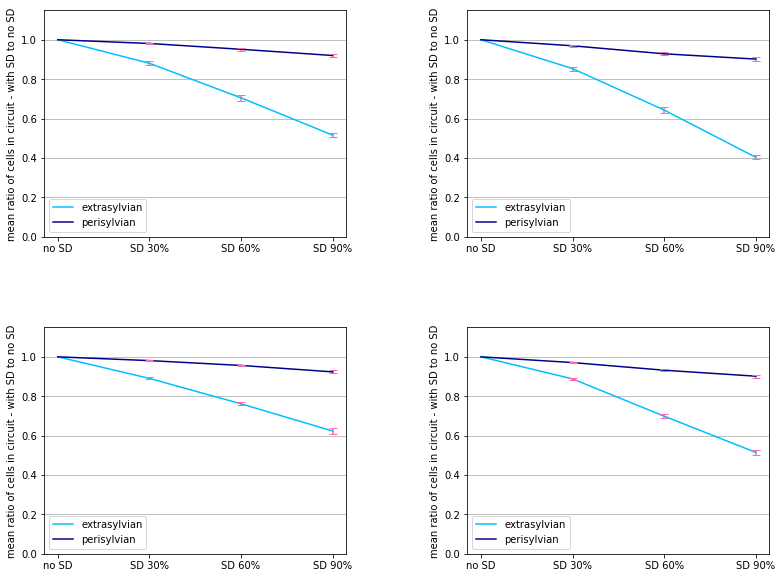

In [43]:
x = [i for i in range(1, 5)]
x_sem = [i for i in range(2,5)]

fig, axes = plt.subplots(2, 2, figsize=(13,10))

plt.subplots_adjust(wspace = 0.4, hspace = 0.4)


# plot 1 -- obj, GM
ax = axes[0][0]

ax.yaxis.grid()  
ax.set_axisbelow(True)

ax.plot(x, mean_extra_obj_gm_rate,  color = 'deepskyblue', label = 'extrasylvian')
ax.plot(x, mean_peri_obj_gm_rate,  color = 'darkblue', label = 'perisylvian')

ax.errorbar(x_sem, mean_extra_obj_gm_rate[1:], yerr = sem_extra_obj_gm_rate, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_sem, mean_peri_obj_gm_rate[1:], yerr = sem_peri_obj_gm_rate, fmt='none', color = 'hotpink', capsize=4)

ax.set_xticks(x) 
ax.set_xticklabels(['no SD', 'SD 30%', 'SD 60%', 'SD 90%'])
ax.set_ylim([0,1.15])                   

ax.set_ylabel('mean ratio of cells in circuit - with SD to no SD')
# ax.set_title('GM SD')
ax.legend(loc = 3)



# plot 2 -- obj, WM
ax = axes[0][1]

ax.yaxis.grid()  
ax.set_axisbelow(True)

ax.plot(x, mean_extra_obj_wm_rate,  color = 'deepskyblue', label = 'extrasylvian')
ax.plot(x, mean_peri_obj_wm_rate,  color = 'darkblue', label = 'perisylvian')

ax.errorbar(x_sem, mean_extra_obj_wm_rate[1:], yerr = sem_extra_obj_wm_rate, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_sem, mean_peri_obj_wm_rate[1:], yerr = sem_peri_obj_wm_rate, fmt='none', color = 'hotpink', capsize=4)

ax.set_xticks(x) 
ax.set_xticklabels(['no SD', 'SD 30%', 'SD 60%', 'SD 90%'])
ax.set_ylim([0,1.15])                   

ax.set_ylabel('mean ratio of cells in circuit - with SD to no SD')
# ax.set_title('WM SD')
ax.legend(loc = 3)



# plot 3 -- act, GM
ax = axes[1][0]

ax.yaxis.grid()  
ax.set_axisbelow(True)

ax.plot(x, mean_extra_act_gm_rate,  color = 'deepskyblue', label = 'extrasylvian')
ax.plot(x, mean_peri_act_gm_rate,  color = 'darkblue', label = 'perisylvian')

ax.errorbar(x_sem, mean_extra_act_gm_rate[1:], yerr = sem_extra_act_gm_rate, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_sem, mean_peri_act_gm_rate[1:], yerr = sem_peri_act_gm_rate, fmt='none', color = 'hotpink', capsize=4)

ax.set_xticks(x) 
ax.set_xticklabels(['no SD', 'SD 30%', 'SD 60%', 'SD 90%'])
ax.set_ylim([0,1.15])                   

ax.set_ylabel('mean ratio of cells in circuit - with SD to no SD')
# ax.set_title('GM SD')
ax.legend(loc = 3)



# plot 2 -- obj, WM
ax = axes[1][1]

ax.yaxis.grid()  
ax.set_axisbelow(True)

ax.plot(x, mean_extra_act_wm_rate,  color = 'deepskyblue', label = 'extrasylvian')
ax.plot(x, mean_peri_act_wm_rate,  color = 'darkblue', label = 'perisylvian')

ax.errorbar(x_sem, mean_extra_act_wm_rate[1:], yerr = sem_extra_act_wm_rate, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_sem, mean_peri_act_wm_rate[1:], yerr = sem_peri_act_wm_rate, fmt='none', color = 'hotpink', capsize=4)

ax.set_xticks(x) 
ax.set_xticklabels(['no SD', 'SD 30%', 'SD 60%', 'SD 90%'])
ax.set_ylim([0,1.15])                   

ax.set_ylabel('mean ratio of cells in circuit - with SD to no SD')
# ax.set_title('WM SD')
ax.legend(loc = 3)


# plt.text(-3.5, 1.35, 'A', fontsize=20)
# plt.text(0.5, 1.35, 'B', fontsize=20)
# plt.text(-3.5, -.25, 'C', fontsize=20)
# plt.text(0.5, -.25, 'D', fontsize=20)


# plt.text(-4, 2, 'object', fontsize=20, rotation=90)
# plt.text(-4, .4, 'action', fontsize=20, rotation=90)

## Fig12

**obj & GM**

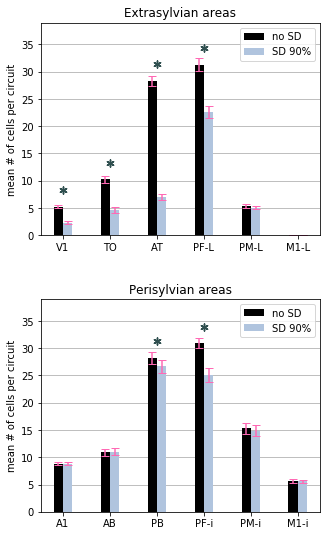

In [44]:
x = [i*2 for i in range(1,7)]
x_wo = [i*2 - 0.2 for i in range(1,7)]
x_90 = [i*2 + 0.2 for i in range(1,7)]

fig, axes = plt.subplots(2, 1, figsize=(5,9))

# fig.suptitle("Extrasylvian areas",y = 0.93, fontsize=20)
plt.subplots_adjust(hspace = 0.3)



# plot 1 -- extra, obj, GM
ax = axes[0]

ax.yaxis.grid()  
ax.set_axisbelow(True)

ax.bar(x_wo, mean_extra_obj_re, width=0.4,  color = 'black', label='no SD')
ax.bar(x_90, mean_extra_obj_gm90, width=0.4,  color = 'lightsteelblue', label='SD 90%')

ax.errorbar(x_wo, mean_extra_obj_re, yerr = sem_extra_obj_re, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_90, mean_extra_obj_gm90, yerr = sem_extra_obj_gm90, fmt='none', color = 'hotpink', capsize=4)

ax.scatter(x[:4], [h+3 for h in mean_extra_obj_re][:4], c = 'darkslategrey', s=50, marker=(6, 2))

ax.set_xticks(x) 
ax.set_xticklabels(columns_extrasylvian)
ax.set_ylim([0, 39])                   

ax.set_ylabel('mean # of cells per circuit')
ax.set_title('Extrasylvian areas')
ax.legend()



# plot 2 -- peri, obj, GM
ax = axes[1]

ax.yaxis.grid()  
ax.set_axisbelow(True)

ax.bar(x_wo, mean_peri_obj_re, width=0.4,  color = 'black', label='no SD')
ax.bar(x_90, mean_peri_obj_gm90, width=0.4,  color = 'lightsteelblue', label='SD 90%')

ax.errorbar(x_wo, mean_peri_obj_re, yerr = sem_peri_obj_re, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_90, mean_peri_obj_gm90, yerr = sem_peri_obj_gm90, fmt='none', color = 'hotpink', capsize=4)

ax.scatter(x[2:4], [h+3 for h in mean_peri_obj_re][2:4], c = 'darkslategrey', s=50, marker=(6, 2))


ax.set_xticks(x) 
ax.set_xticklabels(columns_perisylvian)
ax.set_ylim([0, 39])                   

ax.set_ylabel('mean # of cells per circuit')
ax.set_title('Perisylvian areas')
ax.legend()

**obj & WM**

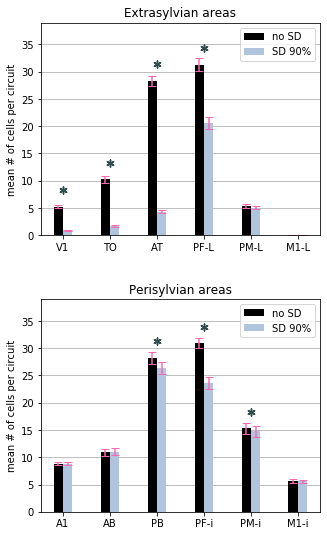

In [45]:
x = [i*2 for i in range(1,7)]
x_wo = [i*2 - 0.2 for i in range(1,7)]
x_90 = [i*2 + 0.2 for i in range(1,7)]

fig, axes = plt.subplots(2, 1, figsize=(5,9))

# fig.suptitle("Extrasylvian areas",y = 0.93, fontsize=20)
plt.subplots_adjust(hspace = 0.3)



# plot 1 -- extra, obj, WM
ax = axes[0]

ax.yaxis.grid()  
ax.set_axisbelow(True)

ax.bar(x_wo, mean_extra_obj_re, width=0.4,  color = 'black', label='no SD')
ax.bar(x_90, mean_extra_obj_wm90, width=0.4,  color = 'lightsteelblue', label='SD 90%')

ax.errorbar(x_wo, mean_extra_obj_re, yerr = sem_extra_obj_re, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_90, mean_extra_obj_wm90, yerr = sem_extra_obj_wm90, fmt='none', color = 'hotpink', capsize=4)

ax.scatter(x[:4], [h+3 for h in mean_extra_obj_re][:4], c = 'darkslategrey', s=50, marker=(6, 2))

ax.set_xticks(x) 
ax.set_xticklabels(columns_extrasylvian)
ax.set_ylim([0, 39])                   

ax.set_ylabel('mean # of cells per circuit')
ax.set_title('Extrasylvian areas')
ax.legend()



# plot 2 -- peri, obj, WM
ax = axes[1]

ax.yaxis.grid()  
ax.set_axisbelow(True)

ax.bar(x_wo, mean_peri_obj_re, width=0.4,  color = 'black', label='no SD')
ax.bar(x_90, mean_peri_obj_wm90, width=0.4,  color = 'lightsteelblue', label='SD 90%')

ax.errorbar(x_wo, mean_peri_obj_re, yerr = sem_peri_obj_re, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_90, mean_peri_obj_wm90, yerr = sem_peri_obj_wm90, fmt='none', color = 'hotpink', capsize=4)

ax.scatter(x[2:5], [h+3 for h in mean_peri_obj_re][2:5], c = 'darkslategrey', s=50, marker=(6, 2))


ax.set_xticks(x) 
ax.set_xticklabels(columns_perisylvian)
ax.set_ylim([0, 39])                   

ax.set_ylabel('mean # of cells per circuit')
ax.set_title('Perisylvian areas')
ax.legend()

**act & GM**

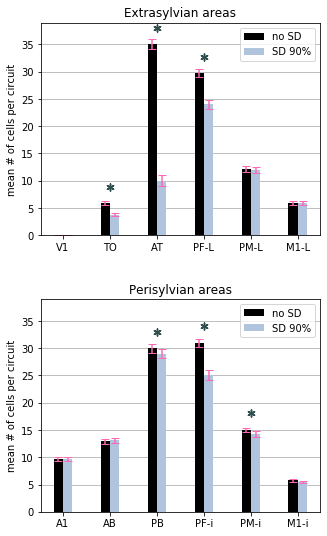

In [46]:
x = [i*2 for i in range(1,7)]
x_wo = [i*2 - 0.2 for i in range(1,7)]
x_90 = [i*2 + 0.2 for i in range(1,7)]

fig, axes = plt.subplots(2, 1, figsize=(5,9))

# fig.suptitle("Extrasylvian areas",y = 0.93, fontsize=20)
plt.subplots_adjust(hspace = 0.3)



# plot 1 -- extra, act, GM
ax = axes[0]

ax.yaxis.grid()  
ax.set_axisbelow(True)

ax.bar(x_wo, mean_extra_act_re, width=0.4,  color = 'black', label='no SD')
ax.bar(x_90, mean_extra_act_gm90, width=0.4,  color = 'lightsteelblue', label='SD 90%')

ax.errorbar(x_wo, mean_extra_act_re, yerr = sem_extra_act_re, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_90, mean_extra_act_gm90, yerr = sem_extra_act_gm90, fmt='none', color = 'hotpink', capsize=4)

ax.scatter(x[1:4], [h+3 for h in mean_extra_act_re][1:4], c = 'darkslategrey', s=50, marker=(6, 2))

ax.set_xticks(x) 
ax.set_xticklabels(columns_extrasylvian)
ax.set_ylim([0, 39])                   

ax.set_ylabel('mean # of cells per circuit')
ax.set_title('Extrasylvian areas')
ax.legend()



# plot 2 -- peri, act, GM
ax = axes[1]

ax.yaxis.grid()  
ax.set_axisbelow(True)

ax.bar(x_wo, mean_peri_act_re, width=0.4,  color = 'black', label='no SD')
ax.bar(x_90, mean_peri_act_gm90, width=0.4,  color = 'lightsteelblue', label='SD 90%')

ax.scatter(x[2:5], [h+3 for h in mean_peri_act_re][2:5], c = 'darkslategrey', s=50, marker=(6, 2))

ax.errorbar(x_wo, mean_peri_act_re, yerr = sem_peri_act_re, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_90, mean_peri_act_gm90, yerr = sem_peri_act_gm90, fmt='none', color = 'hotpink', capsize=4)


ax.set_xticks(x) 
ax.set_xticklabels(columns_perisylvian)
ax.set_ylim([0, 39])                   

ax.set_ylabel('mean # of cells per circuit')
ax.set_title('Perisylvian areas')
ax.legend()

**act & WM**

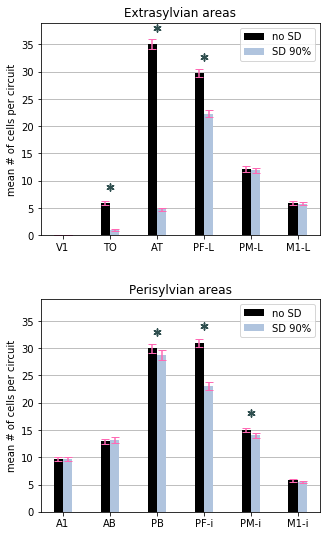

In [47]:
x = [i*2 for i in range(1,7)]
x_wo = [i*2 - 0.2 for i in range(1,7)]
x_90 = [i*2 + 0.2 for i in range(1,7)]

fig, axes = plt.subplots(2, 1, figsize=(5,9))

# fig.suptitle("Extrasylvian areas",y = 0.93, fontsize=20)
plt.subplots_adjust(hspace = 0.3)



# plot 1 -- extra, act, WM
ax = axes[0]

ax.yaxis.grid()  
ax.set_axisbelow(True)

ax.bar(x_wo, mean_extra_act_re, width=0.4,  color = 'black', label='no SD')
ax.bar(x_90, mean_extra_act_wm90, width=0.4,  color = 'lightsteelblue', label='SD 90%')

ax.errorbar(x_wo, mean_extra_act_re, yerr = sem_extra_act_re, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_90, mean_extra_act_wm90, yerr = sem_extra_act_wm90, fmt='none', color = 'hotpink', capsize=4)

ax.scatter(x[1:4], [h+3 for h in mean_extra_act_re][1:4], c = 'darkslategrey', s=50, marker=(6, 2))

ax.set_xticks(x) 
ax.set_xticklabels(columns_extrasylvian)
ax.set_ylim([0, 39])                   

ax.set_ylabel('mean # of cells per circuit')
ax.set_title('Extrasylvian areas')
ax.legend()



# plot 2 -- peri, act, WM
ax = axes[1]

ax.yaxis.grid()  
ax.set_axisbelow(True)

ax.bar(x_wo, mean_peri_act_re, width=0.4,  color = 'black', label='no SD')
ax.bar(x_90, mean_peri_act_wm90, width=0.4,  color = 'lightsteelblue', label='SD 90%')

ax.errorbar(x_wo, mean_peri_act_re, yerr = sem_peri_act_re, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_90, mean_peri_act_wm90, yerr = sem_peri_act_wm90, fmt='none', color = 'hotpink', capsize=4)

ax.scatter(x[2:5], [h+3 for h in mean_peri_act_re][2:5], c = 'darkslategrey', s=50, marker=(6, 2))


ax.set_xticks(x) 
ax.set_xticklabels(columns_perisylvian)
ax.set_ylim([0, 39])                   

ax.set_ylabel('mean # of cells per circuit')
ax.set_title('Perisylvian areas')
ax.legend()

# 3. Graphs for current experiment (exploratory part)

## Fig13

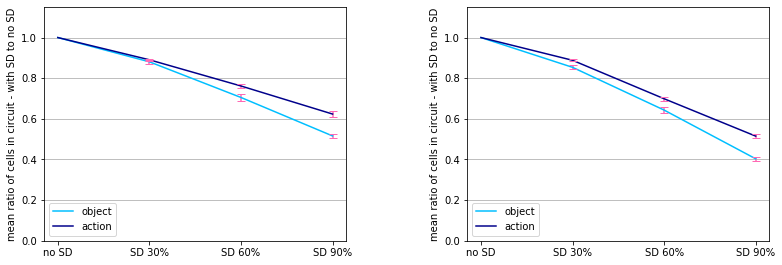

In [48]:
x = [i for i in range(1, 5)]
x_sem = [i for i in range(2,5)]

fig, axes = plt.subplots(1, 2, figsize=(13,4.3))

plt.subplots_adjust(wspace = 0.4)


# plot 1 -- GM
ax = axes[0]

ax.yaxis.grid()  
ax.set_axisbelow(True)

ax.plot(x, mean_extra_obj_gm_rate,  color = 'deepskyblue', label = 'object')
ax.plot(x, mean_extra_act_gm_rate,  color = 'darkblue', label = 'action')

ax.errorbar(x_sem, mean_extra_obj_gm_rate[1:], yerr = sem_extra_obj_gm_rate, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_sem, mean_extra_act_gm_rate[1:], yerr = sem_extra_act_gm_rate, fmt='none', color = 'hotpink', capsize=4)

ax.set_xticks(x) 
ax.set_xticklabels(['no SD', 'SD 30%', 'SD 60%', 'SD 90%'])
ax.set_ylim([0,1.15])                   

ax.set_ylabel('mean ratio of cells in circuit - with SD to no SD')
# ax.set_title('GM SD')
ax.legend(loc = 3)



# plot 2 -- WM
ax = axes[1]

ax.yaxis.grid()  
ax.set_axisbelow(True)

ax.plot(x, mean_extra_obj_wm_rate,  color = 'deepskyblue', label = 'object')
ax.plot(x, mean_extra_act_wm_rate,  color = 'darkblue', label = 'action')

ax.errorbar(x_sem, mean_extra_obj_wm_rate[1:], yerr = sem_extra_obj_wm_rate, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_sem, mean_extra_act_wm_rate[1:], yerr = sem_extra_act_wm_rate, fmt='none', color = 'hotpink', capsize=4)

ax.set_xticks(x) 
ax.set_xticklabels(['no SD', 'SD 30%', 'SD 60%', 'SD 90%'])
ax.set_ylim([0,1.15])                   

ax.set_ylabel('mean ratio of cells in circuit - with SD to no SD')
# ax.set_title('WM SD')
ax.legend(loc = 3)


# plt.text(-3.5, -.2, 'A', fontsize=20)
# plt.text(0.5, -.2, 'B', fontsize=20)


## Fig14

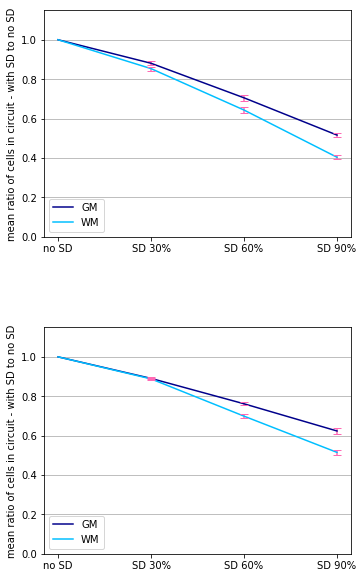

In [49]:
x = [i for i in range(1, 5)]
x_sem = [i for i in range(2,5)]

fig, axes = plt.subplots(2, 1, figsize=(5.5,10))

plt.subplots_adjust(hspace = 0.4)


# plot 1 -- obj
ax = axes[0]

ax.yaxis.grid()  
ax.set_axisbelow(True)

ax.plot(x, mean_extra_obj_gm_rate,  color = 'darkblue', label = 'GM')
ax.plot(x, mean_extra_obj_wm_rate,  color = 'deepskyblue', label = 'WM')

ax.errorbar(x_sem, mean_extra_obj_gm_rate[1:], yerr = sem_extra_obj_gm_rate, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_sem, mean_extra_obj_wm_rate[1:], yerr = sem_extra_obj_wm_rate, fmt='none', color = 'hotpink', capsize=4)

ax.set_xticks(x) 
ax.set_xticklabels(['no SD', 'SD 30%', 'SD 60%', 'SD 90%'])
ax.set_ylim([0,1.15])                   

ax.set_ylabel('mean ratio of cells in circuit - with SD to no SD')
# ax.set_title('OBJECT word')
ax.legend(loc = 3)



# plot 2 -- obj
ax = axes[1]

ax.yaxis.grid()  
ax.set_axisbelow(True)

ax.plot(x, mean_extra_act_gm_rate,  color = 'darkblue', label = 'GM')
ax.plot(x, mean_extra_act_wm_rate,  color = 'deepskyblue', label = 'WM')

ax.errorbar(x_sem, mean_extra_act_gm_rate[1:], yerr = sem_extra_act_gm_rate, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_sem, mean_extra_act_wm_rate[1:], yerr = sem_extra_act_wm_rate, fmt='none', color = 'hotpink', capsize=4)

ax.set_xticks(x) 
ax.set_xticklabels(['no SD', 'SD 30%', 'SD 60%', 'SD 90%'])
ax.set_ylim([0,1.15])                   

ax.set_ylabel('mean ratio of cells in circuit - with SD to no SD')
# ax.set_title('ACTION word')
ax.legend(loc = 3)


# plt.text(0.5, 1.35, 'A', fontsize=20)
# plt.text(0.5, -.25, 'B', fontsize=20)

# 3. Graphs for preliminary results on the lesion nets 

## Fig15


In [50]:
#plot1 extra, obj & V1 lesion

# data
ca_extra_obj_no_lesion = obj_mean_cells_no_lesion[columns_extrasylvian]
ca_extra_obj_V1_lesion = obj_mean_cells_V1_lesion[columns_extrasylvian]


# calculate mean activations between nets per each area
mean_extra_obj_no_lesion = np.mean(ca_extra_obj_no_lesion)
mean_extra_obj_V1_lesion = np.mean(ca_extra_obj_V1_lesion)


# calculate sem (for mean activations between nets) per each area
sem_extra_obj_no_lesion = scipy.stats.sem(ca_extra_obj_no_lesion)
sem_extra_obj_V1_lesion = scipy.stats.sem(ca_extra_obj_V1_lesion)




#plot2 extra, act & M1 lesion

# data
ca_extra_act_no_lesion = act_mean_cells_no_lesion[columns_extrasylvian]
ca_extra_act_M1_lesion = act_mean_cells_M1_lesion[columns_extrasylvian]


# calculate mean activations between nets per each area
mean_extra_act_no_lesion = np.mean(ca_extra_act_no_lesion)
mean_extra_act_M1_lesion = np.mean(ca_extra_act_M1_lesion)


# calculate sem (for mean activations between nets) per each area
sem_extra_act_no_lesion = scipy.stats.sem(ca_extra_act_no_lesion)
sem_extra_act_M1_lesion = scipy.stats.sem(ca_extra_act_M1_lesion)



#plot3 peri, obj & V1 lesion

# data
ca_peri_obj_no_lesion = obj_mean_cells_no_lesion[columns_perisylvian]
ca_peri_obj_V1_lesion = obj_mean_cells_V1_lesion[columns_perisylvian]


# calculate mean activations between nets per each area
mean_peri_obj_no_lesion = np.mean(ca_peri_obj_no_lesion)
mean_peri_obj_V1_lesion = np.mean(ca_peri_obj_V1_lesion)


# calculate sem (for mean activations between nets) per each area
sem_peri_obj_no_lesion = scipy.stats.sem(ca_peri_obj_no_lesion)
sem_peri_obj_V1_lesion = scipy.stats.sem(ca_peri_obj_V1_lesion)




#plot4 peri, act & M1 lesion

# data
ca_peri_act_no_lesion = act_mean_cells_no_lesion[columns_perisylvian]
ca_peri_act_M1_lesion = act_mean_cells_M1_lesion[columns_perisylvian]


# calculate mean activations between nets per each area
mean_peri_act_no_lesion = np.mean(ca_peri_act_no_lesion)
mean_peri_act_M1_lesion = np.mean(ca_peri_act_M1_lesion)


# calculate sem (for mean activations between nets) per each area
sem_peri_act_no_lesion = scipy.stats.sem(ca_peri_act_no_lesion)
sem_peri_act_M1_lesion = scipy.stats.sem(ca_peri_act_M1_lesion)



**obj & V1 lesion**

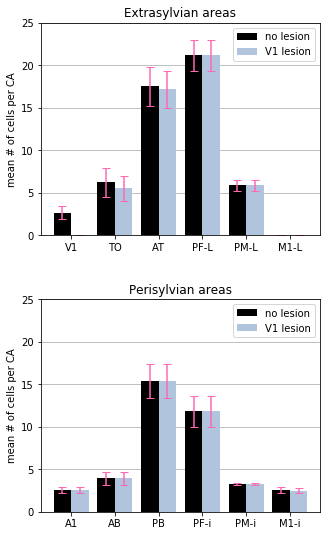

In [52]:
x = [i*2 for i in range(1,7)]
x_no = [i*2 - 0.4 for i in range(1,7)]
x_lesion = [i*2 + 0.4 for i in range(1,7)]

fig, axes = plt.subplots(2, 1, figsize=(5,9))

# fig.suptitle("Extrasylvian areas",y = 0.93, fontsize=20)
plt.subplots_adjust(hspace = 0.3)


#plot1 extra, obj & V1 lesion
ax = axes[0]

ax.yaxis.grid()  
ax.set_axisbelow(True)

ax.bar(x_no, mean_extra_obj_no_lesion, width=0.8,  color = 'black', label='no lesion')
ax.bar(x_lesion, mean_extra_obj_V1_lesion, width=0.8,  color = 'lightsteelblue', label='V1 lesion')

ax.errorbar(x_no, mean_extra_obj_no_lesion, yerr = sem_extra_obj_no_lesion, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_lesion, mean_extra_obj_V1_lesion, yerr = sem_extra_obj_V1_lesion, fmt='none', color = 'hotpink', capsize=4)


ax.set_xticks(x) 
ax.set_xticklabels(columns_extrasylvian)
ax.set_ylim([0, 25])                   

ax.set_ylabel('mean # of cells per CA')
ax.set_title('Extrasylvian areas')
ax.legend()



#plot2 peri, obj & V1 lesion
ax = axes[1]

ax.yaxis.grid()  
ax.set_axisbelow(True)

ax.bar(x_no, mean_peri_obj_no_lesion, width=0.8,  color = 'black', label='no lesion')
ax.bar(x_lesion, mean_peri_obj_V1_lesion, width=0.8,  color = 'lightsteelblue', label='V1 lesion')

ax.errorbar(x_no, mean_peri_obj_no_lesion, yerr = sem_peri_obj_no_lesion, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_lesion, mean_peri_obj_V1_lesion, yerr = sem_peri_obj_V1_lesion, fmt='none', color = 'hotpink', capsize=4)


ax.set_xticks(x) 
ax.set_xticklabels(columns_perisylvian)
ax.set_ylim([0, 25])                   

ax.set_ylabel('mean # of cells per CA')
ax.set_title('Perisylvian areas')
ax.legend()




**act & M1 lesion**

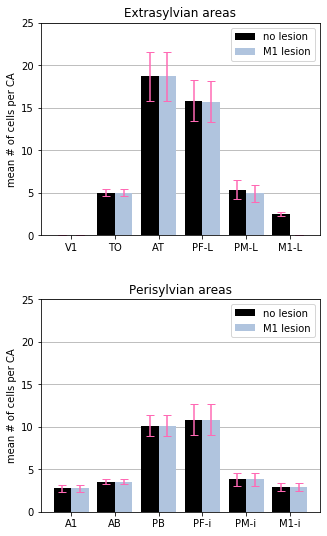

In [53]:
x = [i*2 for i in range(1,7)]
x_no = [i*2 - 0.4 for i in range(1,7)]
x_lesion = [i*2 + 0.4 for i in range(1,7)]

fig, axes = plt.subplots(2, 1, figsize=(5,9))

plt.subplots_adjust(hspace = 0.3)






#plot1 extra, act & M1 lesion
ax = axes[0]

ax.yaxis.grid()  
ax.set_axisbelow(True)

ax.bar(x_no, mean_extra_act_no_lesion, width=0.8,  color = 'black', label='no lesion')
ax.bar(x_lesion, mean_extra_act_M1_lesion, width=0.8,  color = 'lightsteelblue', label='M1 lesion')

ax.errorbar(x_no, mean_extra_act_no_lesion, yerr = sem_extra_act_no_lesion, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_lesion, mean_extra_act_M1_lesion, yerr = sem_extra_act_M1_lesion, fmt='none', color = 'hotpink', capsize=4)


ax.set_xticks(x) 
ax.set_xticklabels(columns_extrasylvian)
ax.set_ylim([0, 25])                   

ax.set_ylabel('mean # of cells per CA')
ax.set_title('Extrasylvian areas')
ax.legend()




#plot2 peri, act & M1 lesion
ax = axes[1]

ax.yaxis.grid()  
ax.set_axisbelow(True)

ax.bar(x_no, mean_peri_act_no_lesion, width=0.8,  color = 'black', label='no lesion')
ax.bar(x_lesion, mean_peri_act_M1_lesion, width=0.8,  color = 'lightsteelblue', label='M1 lesion')

ax.errorbar(x_no, mean_peri_act_no_lesion, yerr = sem_peri_act_no_lesion, fmt='none', color = 'hotpink', capsize=4)
ax.errorbar(x_lesion, mean_peri_act_M1_lesion, yerr = sem_peri_act_M1_lesion, fmt='none', color = 'hotpink', capsize=4)


ax.set_xticks(x) 
ax.set_xticklabels(columns_perisylvian)
ax.set_ylim([0, 25])                   

ax.set_ylabel('mean # of cells per CA')
ax.set_title('Perisylvian areas')
ax.legend()


